# 08 - b - Titan - Feasibility Charts - Lift

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [25]:
# Create a planet object for Titan
planet=Planet("TITAN")

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Titan/titan-gram-avg.dat', 0 , 1 , 2, 3)

In [11]:
vinf_kms_array  = np.linspace( 0.0,   20.0,   11)
betaRatio_array = np.linspace( 1.0,   11.0 ,  11)

In [12]:
v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 + 2*np.ones(len(vinf_kms_array))*planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(betaRatio_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(betaRatio_array)))

In [13]:
beta1 = 20.0

runID = 'titan-drag-'

In [14]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 150.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.setDragModulationVehicleParams(beta1,betaRatio_array[j])

        underShootLimit_array[i,j], exitflag_us_array[i,j] = vehicle.findUnderShootLimitD(6000.0, 1.0, -80.0,-4.0,1E-10,1700.0)
        overShootLimit_array[i,j] , exitflag_os_array[i,j] = vehicle.findOverShootLimitD (6000.0, 1.0, -80.0,-4.0,1E-10,1700.0)

        TCW_array[i,j]    = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print('VINF: '+str(vinf_kms_array[i])+' km/s, BETA RATIO: '+str(betaRatio_array[j])+' TCW: '+str(TCW_array[i,j])+' deg.')

np.savetxt('../data/jsr-paper/titan/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'betaRatio_array.txt',betaRatio_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'underShootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'TCW_array.txt',TCW_array)

VINF: 0.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 0.0 km/s, BETA RATIO: 2.0 TCW: 0.7737579075910617 deg.
VINF: 0.0 km/s, BETA RATIO: 3.0 TCW: 1.227739846384793 deg.
VINF: 0.0 km/s, BETA RATIO: 4.0 TCW: 1.549308853886032 deg.
VINF: 0.0 km/s, BETA RATIO: 5.0 TCW: 1.7978653906757245 deg.
VINF: 0.0 km/s, BETA RATIO: 6.0 TCW: 1.9999547607840213 deg.
VINF: 0.0 km/s, BETA RATIO: 7.0 TCW: 2.1702169561976916 deg.
VINF: 0.0 km/s, BETA RATIO: 8.0 TCW: 2.316864370714029 deg.
VINF: 0.0 km/s, BETA RATIO: 9.0 TCW: 2.445569671504927 deg.
VINF: 0.0 km/s, BETA RATIO: 10.0 TCW: 2.5601319379129563 deg.
VINF: 0.0 km/s, BETA RATIO: 11.0 TCW: 2.6632198371662525 deg.
VINF: 2.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 2.0 km/s, BETA RATIO: 2.0 TCW: 0.8848737447515305 deg.
VINF: 2.0 km/s, BETA RATIO: 3.0 TCW: 1.3967351393439458 deg.
VINF: 2.0 km/s, BETA RATIO: 4.0 TCW: 1.7553337994140747 deg.
VINF: 2.0 km/s, BETA RATIO: 5.0 TCW: 2.0301672345049155 deg.
VINF: 2.0 km/s, BETA RATIO: 6.0 TCW: 2.2520820825884584 

In [15]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(betaRatio_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(betaRatio_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(betaRatio_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(betaRatio_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 150.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)

        vehicle.propogateEntry (6000.0, 1.0, 0.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload


        vehicle=Vehicle('DMVehicle', 150.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams( 1E-5)

        vehicle.propogateEntry (6000.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_os))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", BR: "+str(betaRatio_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))

np.savetxt('../data/jsr-paper/titan/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, BR: 1.0 G_MAX: 0.08142349222472448 QDOT_MAX: 1.5444635518303018 J_MAX: 1488.4455255080902 STAG. PRES: 0.0001605713323756491
V_infty: 0.0 km/s, BR: 2.0 G_MAX: 0.08142349222472448 QDOT_MAX: 1.86498515939083 J_MAX: 1488.4455255080902 STAG. PRES: 0.0001605713323756491
V_infty: 0.0 km/s, BR: 3.0 G_MAX: 0.08142349222472448 QDOT_MAX: 2.0300260199994877 J_MAX: 1488.4455255080902 STAG. PRES: 0.0001605713323756491
V_infty: 0.0 km/s, BR: 4.0 G_MAX: 0.08142349222472448 QDOT_MAX: 2.136041227854041 J_MAX: 1488.4455255080902 STAG. PRES: 0.0001605713323756491
V_infty: 0.0 km/s, BR: 5.0 G_MAX: 0.08142349222472448 QDOT_MAX: 2.2128960768298596 J_MAX: 1488.4455255080902 STAG. PRES: 0.0001605713323756491
V_infty: 0.0 km/s, BR: 6.0 G_MAX: 0.08142349222472448 QDOT_MAX: 2.272299872124921 J_MAX: 1488.4455255080902 STAG. PRES: 0.0001605713323756491
V_infty: 0.0 km/s, BR: 7.0 G_MAX: 0.08142349222472448 QDOT_MAX: 2.320223790228723 J_MAX: 1488.4455255080902 STAG. PRES: 0.0001605713323756491
V_in

V_infty: 10.0 km/s, BR: 5.0 G_MAX: 6.282871205142265 QDOT_MAX: 230.3250337290892 J_MAX: 22855.24959221565 STAG. PRES: 0.012183270017214372
V_infty: 10.0 km/s, BR: 6.0 G_MAX: 6.282871205142265 QDOT_MAX: 233.165685217596 J_MAX: 22855.24959221565 STAG. PRES: 0.012183270017214372
V_infty: 10.0 km/s, BR: 7.0 G_MAX: 6.282871205142265 QDOT_MAX: 235.4584989186636 J_MAX: 22855.24959221565 STAG. PRES: 0.012183270017214372
V_infty: 10.0 km/s, BR: 8.0 G_MAX: 6.282871205142265 QDOT_MAX: 237.37611365563995 J_MAX: 22855.24959221565 STAG. PRES: 0.012183270017214372
V_infty: 10.0 km/s, BR: 9.0 G_MAX: 6.282871205142265 QDOT_MAX: 238.9993590547807 J_MAX: 22855.24959221565 STAG. PRES: 0.012183270017214372
V_infty: 10.0 km/s, BR: 10.0 G_MAX: 6.282871205142265 QDOT_MAX: 240.43872561856375 J_MAX: 22855.24959221565 STAG. PRES: 0.012183270017214372
V_infty: 10.0 km/s, BR: 11.0 G_MAX: 6.282871205142265 QDOT_MAX: 241.72642191695826 J_MAX: 22855.24959221565 STAG. PRES: 0.012183270017214372
V_infty: 12.0 km/s, BR:

V_infty: 20.0 km/s, BR: 9.0 G_MAX: 27.817728240324076 QDOT_MAX: 1835.8852224562481 J_MAX: 81433.50977254406 STAG. PRES: 0.05387377210926142
V_infty: 20.0 km/s, BR: 10.0 G_MAX: 27.817728240324076 QDOT_MAX: 1844.9860103186766 J_MAX: 81433.50977254406 STAG. PRES: 0.05387377210926142
V_infty: 20.0 km/s, BR: 11.0 G_MAX: 27.817728240324076 QDOT_MAX: 1854.767073628947 J_MAX: 81433.50977254406 STAG. PRES: 0.05387377210926142


C:\Users\AthulGirija\anaconda3\envs\env1\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


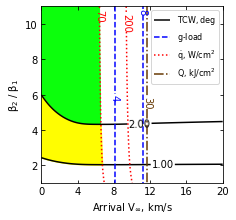

In [23]:
x = np.loadtxt('../data/jsr-paper/titan/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/titan/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
s1 = interpolate.interp2d(x, y, np.transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   20,  110)
y_new =  np.linspace( 0.0,   11 ,110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([1.0,2.0])

Glevels = np.array([4, 8])
Qlevels = np.array([70, 200])
Hlevels = np.array([30])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([3.25,3.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.xlim([0.0,20.0])
plt.ylim([1.0,11.0])


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.2f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[0].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


#GCS1.collections[0].set_label(r'$Peak$'+r' '+r'$g-load$')
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=10)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=10)
plt.xticks(np.array([ 0, 4, 8, 12, 16, 20]), fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=8)

for l in Hlabels:
    l.set_rotation(-90)
for l in Glabels:
    l.set_rotation(-90)

dat0 = ZCS1.allsegs[1][0]

x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)


dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,20,301)
y4 = F1(x4)
y4a =F1a(x4)


y6 = F3(x4)

y7 = y6
y8 = np.minimum(y4,y6)



plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')







plt.savefig('../data/jsr-paper/titan/titan-drag-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/titan/titan-drag-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/titan/titan-drag-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


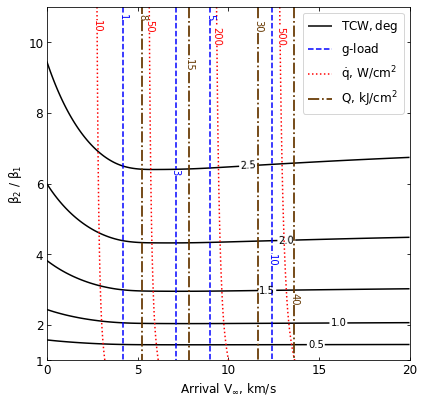

In [24]:
x = np.loadtxt('../data/jsr-paper/titan/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/titan/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'stag_pres_atm_max_array.txt')

f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')

x_new =  np.linspace( 0.0,   20,  210)
y_new =  np.linspace( 1.0,   11 , 110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])

Z1 = z1_new
G1 = g1_new
Q1 = q1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.5, 1.0, 1.5, 2.0, 2.5])

Glevels = np.array([1.0, 3.0 , 5.0, 10.0])
Qlevels = np.array([10.0,  50.0, 200.0, 500.0 ])
Hlevels = np.array([8.0, 15.0, 30.0, 40.0])
#Slevels = np.array([0.8])

fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)

ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[3].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')


for l in Glabels:
    l.set_rotation(-90)



QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)

QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

for l in Hlabels:
    l.set_rotation(-90)
    
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(np.array([ 0.0, 5, 10, 15, 20]),fontsize=12)
plt.yticks(np.array([ 1, 2, 4, 6, 8, 10]),fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=12)

plt.savefig('../data/jsr-paper/titan/titan-drag-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/titan/titan-drag-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/titan/titan-drag-large.eps', dpi=300,bbox_inches='tight')


 
plt.show()
